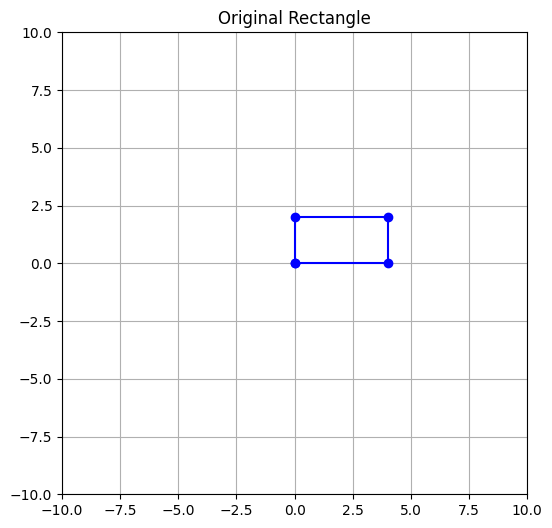

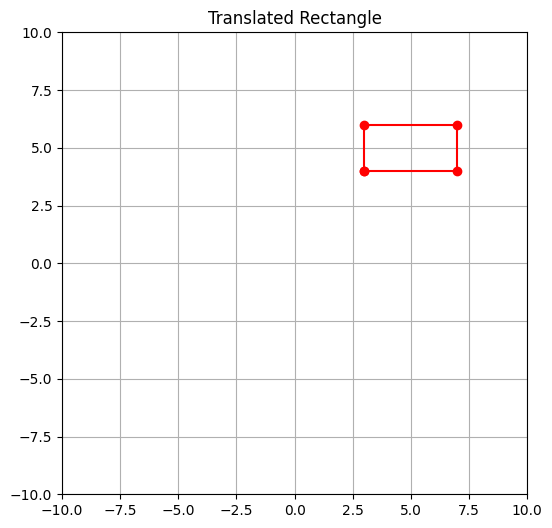

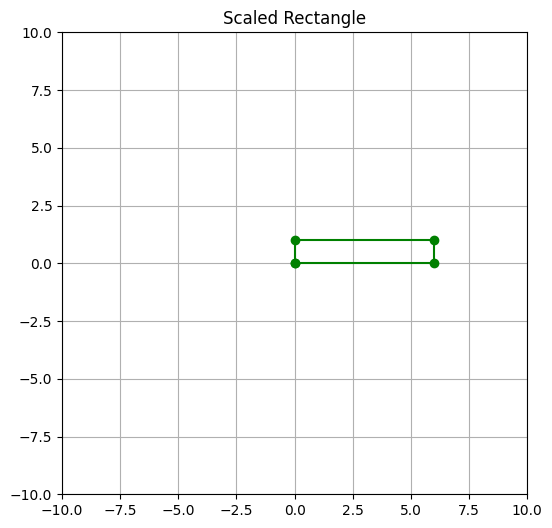

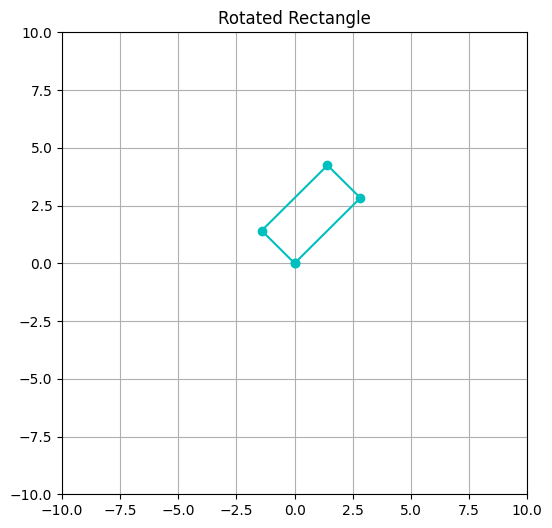

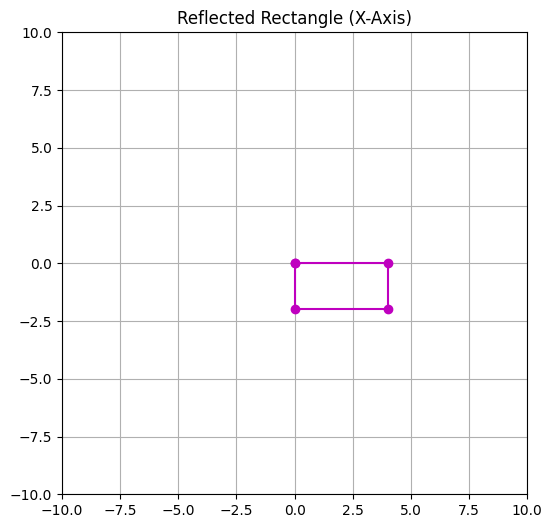

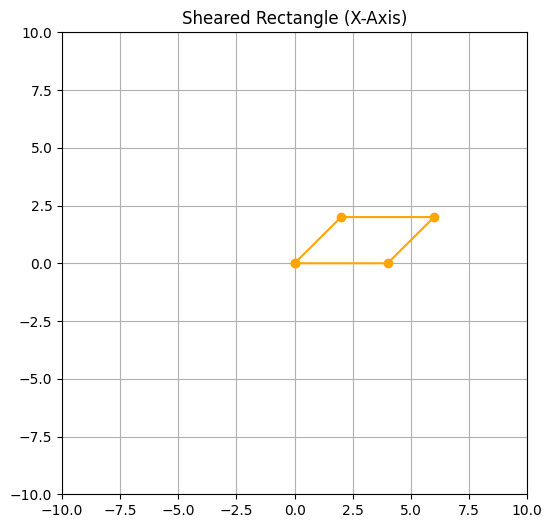

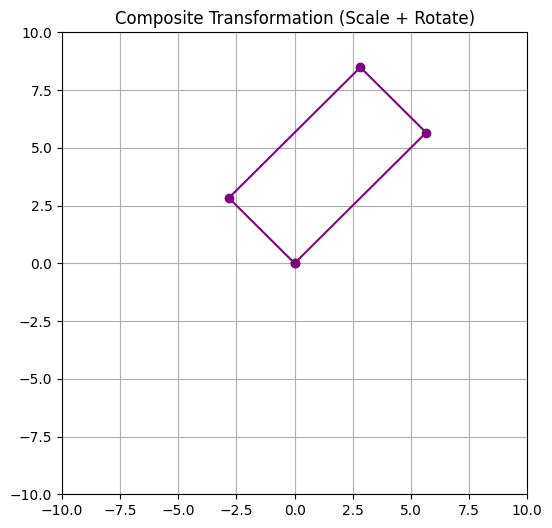

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the 2D object
def plot_object(points, title="2D Object", color='b'):
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color)
    plt.title(title)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid()
    plt.show()

# Original 2D object (rectangle) in homogeneous coordinates
rectangle = np.array([
    [0, 0, 1],  # Bottom-left
    [4, 0, 1],  # Bottom-right
    [4, 2, 1],  # Top-right
    [0, 2, 1],  # Top-left
    [0, 0, 1]   # Closing the rectangle
])

# Plot the original object
plot_object(rectangle, "Original Rectangle")

def translate(points, tx, ty):
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return points @ T.T

def scale(points, sx, sy):
    S = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return points @ S.T

def rotate(points, angle):
    rad = np.deg2rad(angle)
    R = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad),  np.cos(rad), 0],
        [0, 0, 1]
    ])
    return points @ R.T

def reflect(points, axis):
    if axis == 'x':
        R = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        R = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        R = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    return points @ R.T

def shear(points, shx, shy):
    Sh = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return points @ Sh.T

# Composite transformation: scaling + rotation
def composite_transformation(points):
    # First scale, then rotate
    scaled = scale(points, 2, 2)  # Scale by 2 in both directions
    rotated = rotate(scaled, 45)  # Rotate by 45 degrees
    return rotated

# Apply transformations
translated_rectangle = translate(rectangle, 3, 4)
scaled_rectangle = scale(rectangle, 1.5, 0.5)
rotated_rectangle = rotate(rectangle, 45)
reflected_rectangle_x = reflect(rectangle, 'x')
sheared_rectangle = shear(rectangle, 1, 0)  # Shear along x-axis
composite_rectangle = composite_transformation(rectangle)

# Plot transformed objects
plot_object(translated_rectangle, "Translated Rectangle", color='r')
plot_object(scaled_rectangle, "Scaled Rectangle", color='g')
plot_object(rotated_rectangle, "Rotated Rectangle", color='c')
plot_object(reflected_rectangle_x, "Reflected Rectangle (X-Axis)", color='m')
plot_object(sheared_rectangle, "Sheared Rectangle (X-Axis)", color='orange')
plot_object(composite_rectangle, "Composite Transformation (Scale + Rotate)", color='purple')


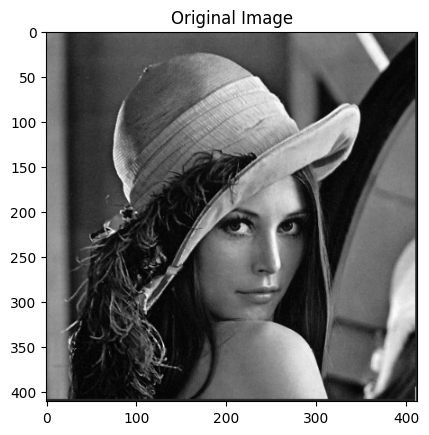

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/Screenshot from 2025-01-17 09-11-49.png')  # Replace with the path to your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
plt.imshow(image)
plt.title("Original Image")
plt.show()


In [ ]:
rows, cols = image.shape[:2]
M = np.float32([[1, 0, 50], [0, 1, 100]])  # Translate by (50, 100)
translated_image = cv2.warpAffine(image, M, (cols, rows))


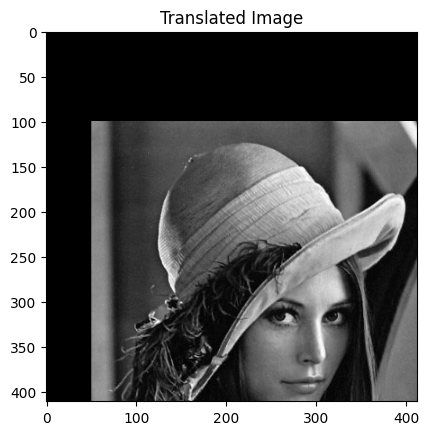

In [ ]:
plt.imshow(translated_image)
plt.title("Translated Image")
plt.show()


In [ ]:
flipped_image = cv2.flip(image, 1)  # Horizontal flip


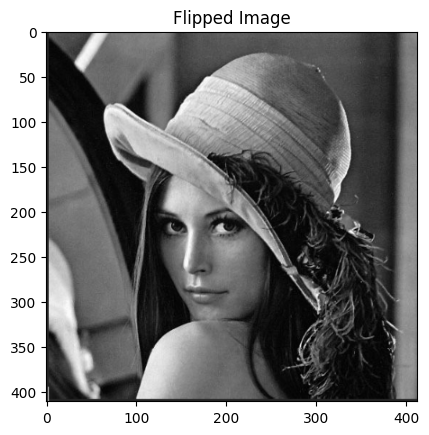

In [ ]:
plt.imshow(flipped_image)
plt.title("Flipped Image")
plt.show()


In [ ]:
angle = 45
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))


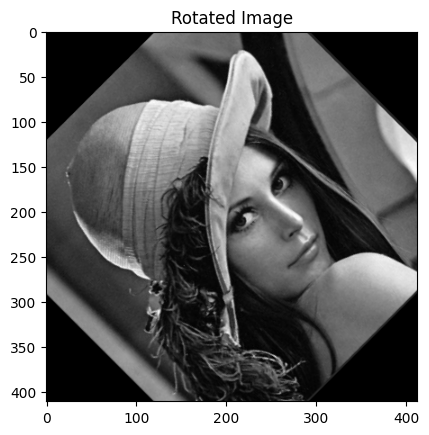

In [ ]:
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.show()

In [ ]:
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5)


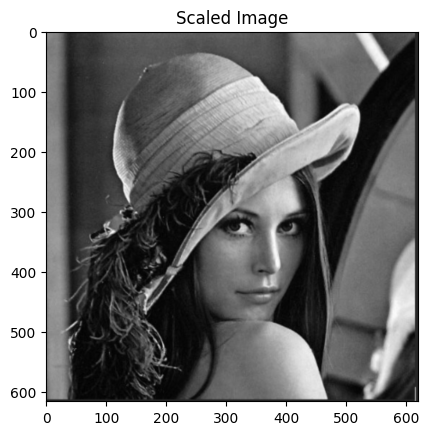

In [ ]:
plt.imshow(scaled_image)
plt.title("Scaled Image")
plt.show()

In [ ]:
cropped_image = image[50:200, 50:200]


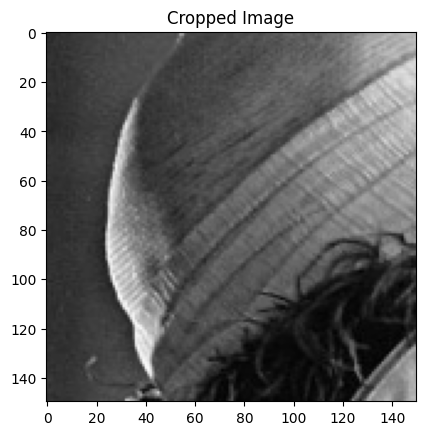

In [ ]:
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.show()

In [ ]:
M = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_x_image = cv2.warpAffine(image, M, (int(cols*1.5), rows))


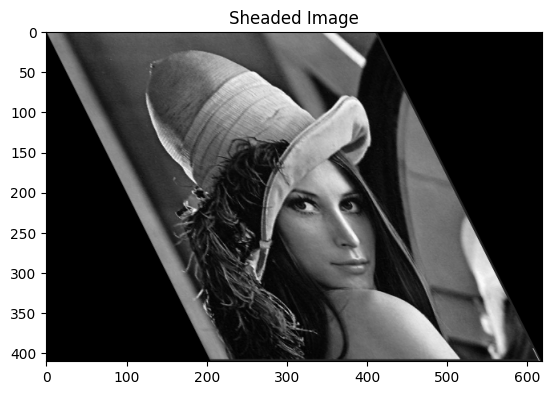

In [ ]:
plt.imshow(sheared_x_image)
plt.title("Sheaded Image")
plt.show()

In [ ]:
M = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_y_image = cv2.warpAffine(image, M, (cols, int(rows*1.5)))


In [ ]:
plt.imshow(flipped_image)
plt.title("Translated Image")
plt.show()